In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

In [61]:
train = pd.read_csv("data_titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Fonctions utiles

In [62]:
# utils fonctions
def cast_cols(df, col_to_cast, type='object'):
    for col in col_to_cast:
        df[col] = df[col].astype(type)
    return df

def fill_missing_values(df):
    for col in df.columns:
        if(df[col].dtype == float) or (df[col].dtype == int):
            df[col] = df[col].fillna(df[col].median())
        if(df[col].dtype == object):
            df[col] = df[col].fillna(df[col].mode()[0])
    return df

def parse_model(df, target_col, x_cols):
    if target_col not in df.columns:
        raise ValueError("Target colums should belong to df")
    y = df[target_col]
    X = df[x_cols]
    return X, y

# Pre-processing

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
df = cast_cols(train, ['Survived'])

In [65]:
df =  fill_missing_values(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\TAMONGOUOBOUCALVINEC\AppData\Local\Temp\ipykernel_11288\29879012.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [66]:
X, y = parse_model(df, 'Survived', ['SibSp', 'Parch', 'Fare'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model trainning (bas model)

In [67]:
# build logistic regression modele
Reg_log = LogisticRegression(random_state=42)

# trainning model on train set
Reg_log.fit(X_train, y_train)

# make prediction
y_pred = Reg_log.predict(X_test)

# compute score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.664179104477612


In [68]:
# evaluation
# train score
train_score = Reg_log.score(X_train, y_train)
print("Train score: {:0.2%}".format(train_score))

# test score
test_score = Reg_log.score(X_test, y_test)
print("Test score: {:0.2%}".format(test_score))

# metric de classificatio
print(metrics.classification_report(y_test, y_pred))

Train score: 68.06%
Test score: 66.42%
              precision    recall  f1-score   support

           0       0.65      0.94      0.77       157
           1       0.76      0.28      0.41       111

    accuracy                           0.66       268
   macro avg       0.70      0.61      0.59       268
weighted avg       0.69      0.66      0.62       268



In [69]:
# cross validation
kf = KFold(n_splits=5, shuffle=True)
cv_score = cross_val_score(Reg_log, X, y, cv=kf, n_jobs=1)
print(cv_score)
print(f"Mean score: {cv_score.mean()}")

[0.6424581  0.64606742 0.69101124 0.67977528 0.7247191 ]
Mean score: 0.6768062268533049


In [70]:
# model coef
Reg_log.coef_

array([[-0.25510385,  0.17798845,  0.01534984]])

# Feature engineering

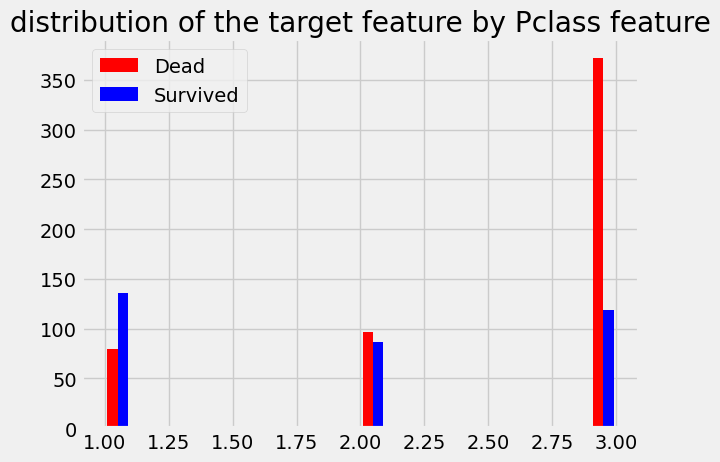

In [71]:
mask = df['Survived'] == 0
dead = df[mask]
survived = df[~mask]

style.use('fivethirtyeight')
%matplotlib inline

x1 = np.array(dead['Pclass'].dropna())
x2 = np.array(survived['Pclass'].dropna())
plt.hist([x1, x2], label=['Dead', 'Survived'], bins=20, color=['r', 'b'])
plt.legend(loc="upper left")
plt.title("distribution of the target feature by Pclass feature")
plt.show()


In [72]:
df = cast_cols(df, ['Pclass'])

## adding Pclass feature to the previous model

In [73]:
X, y = parse_model(df, 'Survived', ['SibSp', 'Parch', 'Fare', 'Pclass'])
# applying one hot encoding to Pclass which is categorical variable
X_dummies = pd.get_dummies(X['Pclass'], prefix='Pclass', drop_first=False, dummy_na=False, prefix_sep='_')
X = X.join(X_dummies).drop("Pclass", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build logistic regression modele
Reg_log = LogisticRegression(random_state=42)

# trainning model on train set
Reg_log.fit(X_train, y_train)

# make prediction
y_pred = Reg_log.predict(X_test)

# compute score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.7276119402985075


## looking for adding new new features to enhance the model

In [74]:
X, y = parse_model(df, 'Survived', ['SibSp', 'Parch', 'Fare', 'Sex', 'Pclass'])
# applying one hot encoding to Pclass which is categorical variable
X = pd.get_dummies(X, columns=['Sex', 'Pclass'], drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build logistic regression modele
Reg_log = LogisticRegression(random_state=42)

# trainning model on train set
Reg_log.fit(X_train, y_train)

# make prediction
y_pred = Reg_log.predict(X_test)

# compute score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.7947761194029851


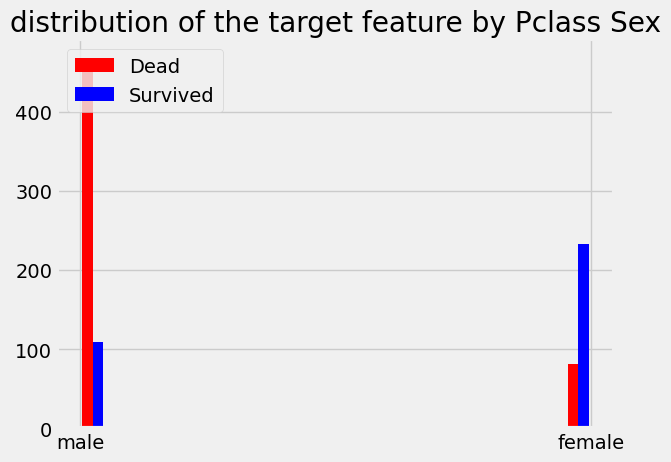

In [75]:
mask = df['Survived'] == 0
dead = df[mask]
survived = df[~mask]

style.use('fivethirtyeight')
%matplotlib inline

x1 = np.array(dead['Sex'].dropna())
x2 = np.array(survived['Sex'].dropna())
plt.hist([x1, x2], label=['Dead', 'Survived'], bins=20, color=['r', 'b'])
plt.legend(loc="upper left")
plt.title("distribution of the target feature by Pclass Sex")
plt.show()


The male passenger have less probaility to survived to the titanic shipwreck

In [76]:
mask = df['Age'] < 10.0
df['isChild'] = np.where(mask, 1, 0)
df = cast_cols(df, ['isChild'])

## adding age categorical feature to the previous model

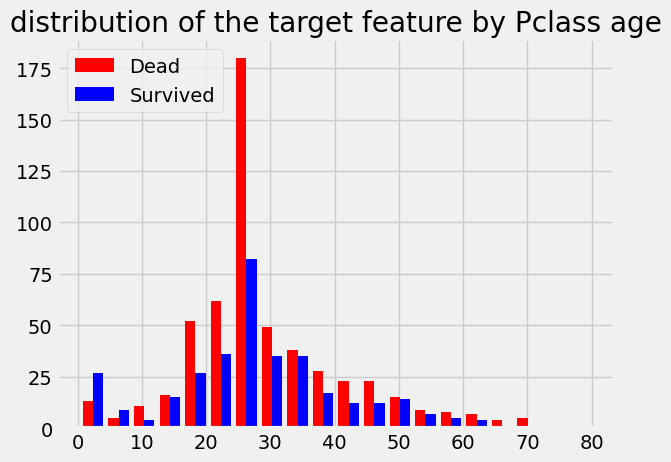

In [77]:
style.use('fivethirtyeight')
%matplotlib inline

x1 = np.array(dead['Age'].dropna())
x2 = np.array(survived['Age'].dropna())
plt.hist([x1, x2], label=['Dead', 'Survived'], bins=20, color=['r', 'b'])
plt.legend(loc="upper left")
plt.title("distribution of the target feature by Pclass age")
plt.show()


We can notice the passengers with less tha 10 years old have more chance to survived to the titanic shipwreck. From that, we are going to create new feature based on the rule if a passenger is less than 10 years old.

In [78]:
X, y = parse_model(df, 'Survived', ['SibSp', 'Parch', 'Fare', 'Sex', 'Pclass', 'isChild'])
# applying one hot encoding to Pclass which is categorical variable
X = pd.get_dummies(X, columns=['Sex', 'Pclass', 'isChild'], drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build logistic regression modele
Reg_log = LogisticRegression(random_state=42)

# trainning model on train set
Reg_log.fit(X_train, y_train)

# make prediction
y_pred = Reg_log.predict(X_test)

# compute score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.8097014925373134


c:\Users\TAMONGOUOBOUCALVINEC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## adding social rank

In [79]:
df['title'] = df['Name'].apply(lambda x: x.split(' ')[1].split('.')[0].strip())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isChild,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,Mr


In [80]:
name = 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
#map('(' in name

In [81]:
# df['surname'] = df['Name'].map(lambda x: '(' in x)
# df.drop('surname')

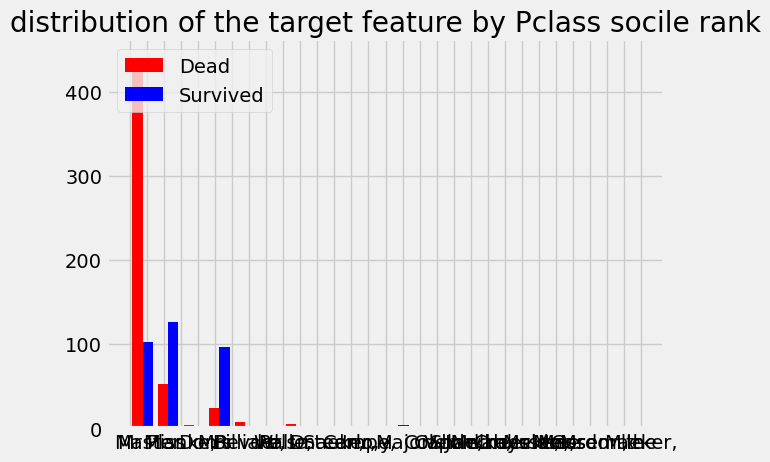

In [82]:
mask = df['Survived'] == 0
dead = df[mask]
survived = df[~mask]

style.use('fivethirtyeight')
%matplotlib inline
#figure()
x1 = np.array(dead['title'].dropna())
x2 = np.array(survived['title'].dropna())
plt.hist([x1, x2], label=['Dead', 'Survived'], bins=20, color=['r', 'b'])
plt.legend(loc="upper left")
plt.title("distribution of the target feature by Pclass socile rank")
plt.show()

In [83]:
X, y = parse_model(df, 'Survived', ['SibSp', 'Parch', 'Fare', 'Sex', 'Pclass', 'isChild', 'title'])
# applying one hot encoding to Pclass which is categorical variable
X = pd.get_dummies(X, columns=['Sex', 'Pclass', 'isChild', 'title'], drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build logistic regression modele
Reg_log = LogisticRegression(random_state=42)

# trainning model on train set
Reg_log.fit(X_train, y_train)

# make prediction
y_pred = Reg_log.predict(X_test)

# compute score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.8171641791044776


c:\Users\TAMONGOUOBOUCALVINEC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------

In [84]:
def cast_cols(df, col_to_cast, type='object'):
    for col in col_to_cast:
        df[col] = df[col].astype(type)
    return df

def fill_missing_values(df):
    for col in df.columns:
        if(df[col].dtype == float) or (df[col].dtype == int):
            df[col] = df[col].fillna(df[col].median())
        if(df[col].dtype == object):
            df[col] = df[col].fillna(df[col].mode()[0])
    return df

def parse_model(df, target_col, x_cols):
    if target_col not in df.columns:
        raise ValueError("Target colums should belong to df")
    y = df[target_col]
    X = df[x_cols]
    return X, y

In [85]:
def transform(df):
    # cast variable
    df = cast_cols(df, ['Survived', 'Pclass'])
    
    # missing values
    df = fill_missing_values(df)
    
    # add is child column
    df['isChild'] = df['Age'].apply(lambda x: 1 if x < 10  else 0)

    # add tittle colubn
    df['title'] = df['Name'].apply(lambda x: x.split(' ')[1].split('.')[0].strip())

    # adding surname
    df['surname'] = df['Name'].map(lambda x: '(' in x)

    # parse model
    return parse_model(df, 'Survived', ['SibSp', 'Parch', 'Fare', 'Sex', 'Pclass', 'isChild', 'title', 'surname'])

# -----------------------------------------------------------------------------------------------------------------

def modelisation(X, y, model=LogisticRegression(random_state=42)):
    # applying one hot encoding to Pclass which is categorical variable
    X = pd.get_dummies(X, columns=['Sex', 'Pclass', 'isChild', 'title'], drop_first=False)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # trainning model on train set
    model.fit(X_train, y_train)
    # make prediction
    y_pred = model.predict(X_test)

    train_score = model.score(X_train, y_train)
    print("Train score: {:0.2%}".format(train_score))
    
    # test score
    test_score = model.score(X_test, y_test)
    print("Test score: {:0.2%}".format(test_score))

    # compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap="Blues")
    

In [88]:
train = pd.read_csv("data_titanic/train.csv")
X, y = transform(train)
modelisation(X, y)

Train score: 83.79%
Test score: 83.58%


C:\Users\TAMONGOUOBOUCALVINEC\AppData\Local\Temp\ipykernel_11288\1072892783.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])
c:\Users\TAMONGOUOBOUCALVINEC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Fonctions auxiliaires (inchangées)
def cast_cols(df, columns):
    """Convertit les colonnes spécifiées en type 'category'."""
    for col in columns:
        df[col] = df[col].astype('category')
    return df

def fill_missing_values(df):
    """Impute les valeurs manquantes."""
    # Remplissage des colonnes catégoriques avec le mode
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    # Remplissage des colonnes numériques avec la médiane
    numeric_cols = df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        df[col].fillna(df[col].median(), inplace=True)
    
    return df

def parse_model(df, target, features):
    """Prépare les données pour la modélisation."""
    X = df[features]
    y = df[target]
    return X, y

# Fonction transform
def transform(df):
    # Cast variable
    df = cast_cols(df, ['Survived', 'Pclass'])
    
    # Missing values
    df = fill_missing_values(df)
    
    # Add isChild column
    df['isChild'] = df['Age'].apply(lambda x: 1 if x < 10 else 0)

    # Add title column
    df['title'] = df['Name'].apply(lambda x: x.split(' ')[1].split('.')[0].strip())

    # Adding surname
    df['surname'] = df['Name'].map(lambda x: '(' in x)

    # Parse model
    return parse_model(df, 'Survived', ['SibSp', 'Parch', 'Fare', 'Sex', 'Pclass', 'isChild', 'title', 'surname'])

# Fonction modelisation
def modelisation(X, y, model_name="logistic", random_state=42):
   
    # Encodage des variables catégoriques
    X = pd.get_dummies(X, columns=['Sex', 'Pclass', 'isChild', 'title'], drop_first=False)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Choisir le modèle
    if model_name == "logistic":
        model = LogisticRegression(random_state=random_state)
    elif model_name == "random_forest":
        model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=random_state)
    else:
        raise ValueError("Modèle non pris en charge. Choisissez 'logistic' ou 'random_forest'.")

    # Entraîner le modèle
    model.fit(X_train, y_train)

    # Faire des prédictions
    y_pred = model.predict(X_test)

    # Scores
    train_score = model.score(X_train, y_train)
    test_score = accuracy_score(y_test, y_pred)

    print(f"Train score ({model_name}): {train_score:.2%}")
    print(f"Test score ({model_name}): {test_score:.2%}")

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap="Blues")
    return model

# Charger les données Titanic
data_path = "data_titanic/train.csv"  # Remplacez par votre chemin
df = pd.read_csv(data_path)

# Transformation des données
X, y = transform(df)

# Modélisation avec Logistic Regression
print("\n=== Logistic Regression ===")
modelisation(X, y, model_name="logistic")

# Modélisation avec Random Forest
print("\n=== Random Forest ===")
modelisation(X, y, model_name="random_forest")


C:\Users\TAMONGOUOBOUCALVINEC\AppData\Local\Temp\ipykernel_11288\2313938398.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\TAMONGOUOBOUCALVINEC\AppData\Local\Temp\ipykernel_11288\2313938398.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw


=== Logistic Regression ===
Train score (logistic): 83.79%
Test score (logistic): 83.58%

=== Random Forest ===
Train score (random_forest): 92.13%
Test score (random_forest): 80.22%


RandomForestClassifier(max_depth=10, random_state=42)